In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import pandas as pd
import cartopy.mpl.ticker as cticker
from matplotlib.animation import FuncAnimation
import imageio.v2 as imageio

In [6]:
file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)

file = '/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP4-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'      #SSP434
dset = xr.open_dataset(file, decode_times=False)
dset = dset.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset=dset.assign_coords(Latitude=dset['LATIXY'][:,0].values)
dset=dset.assign_coords(Longitude=dset['LONGXY'][0,:].values)
dset1['PCT_CROP_area']=(dset1['PCT_CROP']/100)*dset1['AREA']*dset1['LANDFRAC_PFT']
dset1['PCT_CFT_area'] =(dset1['PCT_CFT']/100)*dset1['PCT_CROP_area']
dset1['PCT_NAT_PFT_area']=dset1['PCT_NAT_PFT']/100*dset1['AREA']*dset1['LANDFRAC_PFT']
dset['PCT_CROP_area']=(dset['PCT_CROP']/100)*dset['AREA']*dset['LANDFRAC_PFT']
dset['PCT_CFT_area'] =(dset['PCT_CFT']/100)*dset['PCT_CROP_area']
dset['PCT_NAT_PFT_area']=dset['PCT_NAT_PFT']/100*dset['AREA']*dset['LANDFRAC_PFT']
print(dset1['PCT_CROP_area'].sel(time=2090).sum())
print(dset['PCT_CROP_area'].sel(time=2090).sum())
print(dset1['PCT_CFT_area'].sel(time=2090).sum())
print(dset['PCT_CFT_area'].sel(time=2090).sum())


<xarray.DataArray 'PCT_CROP_area' ()>
array(23438144.5629816)
Coordinates:
    time     int32 2090
<xarray.DataArray 'PCT_CROP_area' ()>
array(26798734.87788251)
Coordinates:
    time     int32 2090
<xarray.DataArray 'PCT_CFT_area' ()>
array(23438144.56298161)
Coordinates:
    time     int32 2090
<xarray.DataArray 'PCT_CFT_area' ()>
array(26798734.87788251)
Coordinates:
    time     int32 2090


In [30]:
dset

<xarray.Dataset>
Dimensions:                  (natpft: 15, cft: 64, Latitude: 96,
                              Longitude: 144, time: 251)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16 17 18 19 20 ... 73 74 75 76 77 78
  * time                     (time) int32 1850 1851 1852 1853 ... 2098 2099 2100
  * Latitude                 (Latitude) float64 -90.0 -88.11 ... 88.11 90.0
  * Longitude                (Longitude) float64 0.0 2.5 5.0 ... 355.0 357.5
Data variables: (12/24)
    LANDFRAC_PFT             (Latitude, Longitude) float64 ...
    PFTDATA_MASK             (Latitude, Longitude) int32 ...
    PCT_CROP                 (time, Latitude, Longitude) float64 0.0 0.0 ... 0.0
    PCT_CROP_MAX             (Latitude, Longitude) float64 ...
    PCT_NAT_PFT              (time, natpft, Latitude, Longitude) float64 100....
    PCT_NAT_PFT_MAX          (natpft, Latitude, Longitude) float64 ...
    ...                       ...
    GRAZING                  (time, Latitude, Longitude) float64 ...
    FERTNITRO_CFT            (time, cft, Latitude, Longitude) float64 ...
    UNREPRESENTED_PFT_LULCC  (time, natpft, Latitude, Longitude) float64 ...
    UNREPRESENTED_CFT_LULCC  (time, cft, Latitude, Longitude) float64 ...
    PCT_CROP_area            (time, Latitude, Longitude) float64 0.0 0.0 ... 0.0
    PCT_CFT_area             (time, cft, Latitude, Longitude) float64 0.0 ......
Attributes: (12/41)
    Conventions:                          NCAR-CSM
    History_Log:                          created on: 02-28-19 14:02:56
    Logname:                              erik
    Host:                                 cheyenne3
    Source:                               Community Land Model: CLM5
    Version:                              release-clm5.0.18/gpfs/fs1/scratch/...
    ...                                   ...
    map_agfirepkmon_file:                 map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_gdp_file:                         map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_peatland_file:                    map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_soildepth_file:                   map_5x5min_ORNL-Soil_to_1.9x2.5_nom...
    map_topography_stats_file:            map_1km-merge-10min_HYDRO1K-merge-n...
    Vegetation_type_raw_data_filename:    mksrf_landuse_histclm50_LUH2_1850.c...

##plot the differences in PCT_CROP

<xarray.DataArray 'PCT_CROP_area' ()>
array(23438144.5629816)
Coordinates:
    time     int32 2090


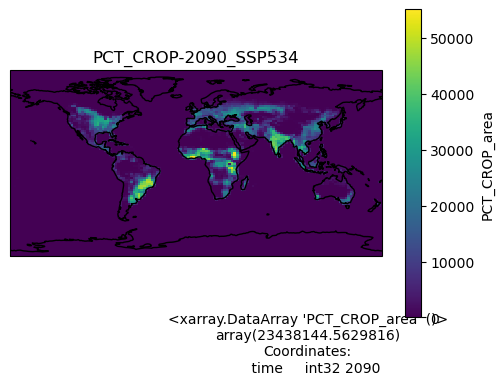

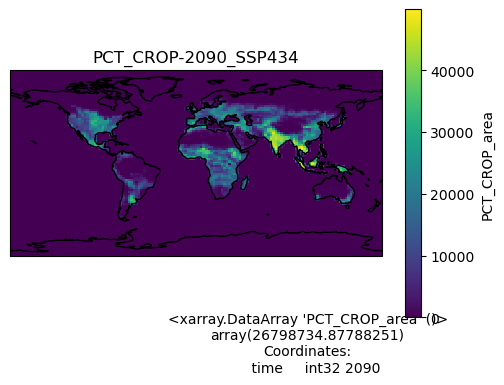

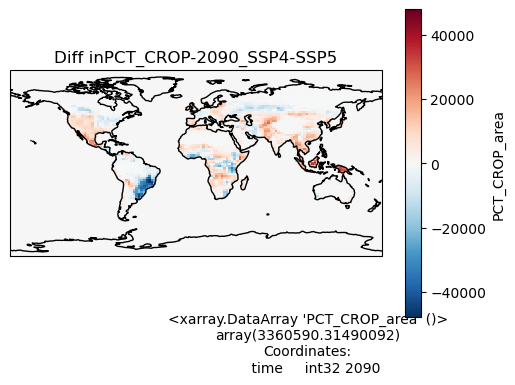

In [4]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CROP_area'].sel(time=2090).plot()
plt.title('PCT_CROP-2090_SSP534')
print(dset1['PCT_CROP_area'].sel(time=2090).sum())
plt.text(0.8, -0.3, dset1['PCT_CROP_area'].sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset['PCT_CROP_area'].sel(time=2090).plot()
plt.title('PCT_CROP-2090_SSP434')
plt.text(0.8, -0.3, dset['PCT_CROP_area'].sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)


fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(dset['PCT_CROP_area'].sel(time=2090)-dset1['PCT_CROP_area'].sel(time=2090)).plot()
b=(dset['PCT_CROP_area'].sel(time=2090)-dset1['PCT_CROP_area'].sel(time=2090))
plt.title('Diff inPCT_CROP-2090_SSP4-SSP5')
plt.text(0.8, -0.3, b.sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

##plot the differences in PCT_CFT

<xarray.DataArray 'PCT_CFT_area' ()>
array(2385785.14675799)
Coordinates:
    time     int32 2090


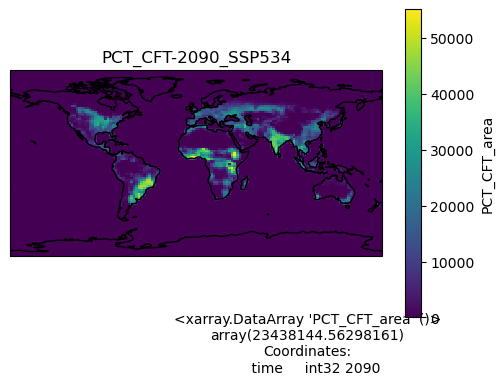

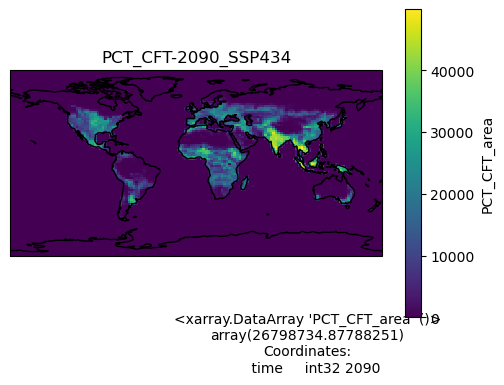

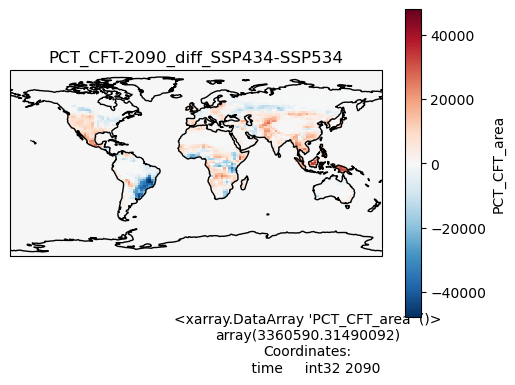

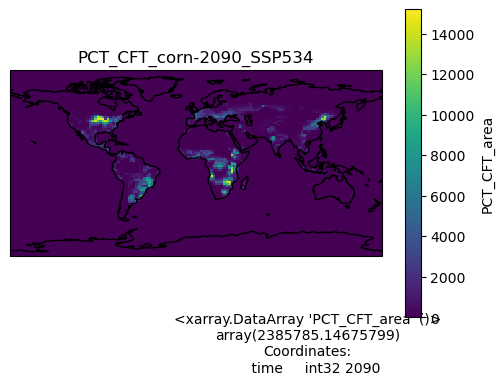

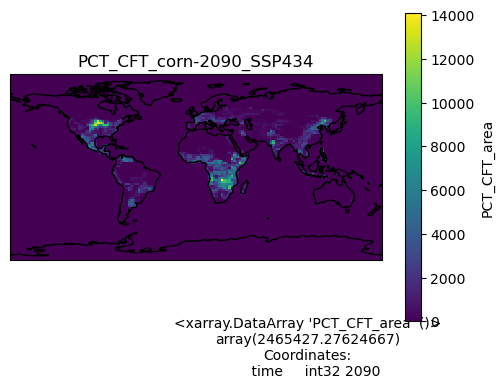

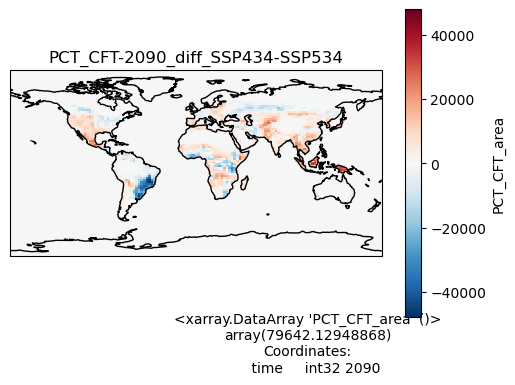

In [51]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].sel(time=2090).sum('cft').plot()
plt.title('PCT_CFT-2090_SSP534')
#print(dset1['PCT_CFT_area'].sel(time=2090).sum())
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset['PCT_CFT_area'].sel(time=2090).sum('cft').plot()
plt.title('PCT_CFT-2090_SSP434')
plt.text(0.8, -0.3, dset['PCT_CFT_area'].sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(dset['PCT_CFT_area'].sel(time=2090).sum('cft')-dset1['PCT_CFT_area'].sel(time=2090).sum('cft')).plot()
plt.title('PCT_CFT-2090_diff_SSP434-SSP534')
b=(dset['PCT_CFT_area'].sel(time=2090).sum('cft')-dset1['PCT_CFT_area'].sel(time=2090).sum('cft'))
plt.text(0.8, -0.3, b.sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)


## All corn ['PCT_CFT'].sel(cft=dset.cft[[2, 3, 60, 61]]).sum(dim='cft')


fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_CFT_area'].sel(cft=dset.cft[[2, 3, 60, 61]]).sum(dim='cft').sel(time=2090).plot()
plt.title('PCT_CFT_corn-2090_SSP534')
print(dset1['PCT_CFT_area'].sel(cft=dset.cft[[2, 3, 60, 61]]).sum(dim='cft').sel(time=2090).sum())
plt.text(0.8, -0.3, dset1['PCT_CFT_area'].sel(cft=dset.cft[[2, 3, 60, 61]]).sum(dim='cft').sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset['PCT_CFT_area'].sel(cft=dset.cft[[2, 3, 60, 61]]).sum(dim='cft').sel(time=2090).plot()
plt.title('PCT_CFT_corn-2090_SSP434')
plt.text(0.8, -0.3, dset['PCT_CFT_area'].sel(cft=dset.cft[[2, 3, 60, 61]]).sum(dim='cft').sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(dset['PCT_CFT_area'].sel(time=2090).sum('cft')-dset1['PCT_CFT_area'].sel(time=2090).sum('cft')).plot()
plt.title('PCT_CFT-2090_diff_SSP434-SSP534')
b=(dset['PCT_CFT_area'].sel(cft=dset.cft[[2, 3, 60, 61]]).sum(dim='cft').sel(time=2090))-(dset1['PCT_CFT_area'].sel(cft=dset.cft[[2, 3, 60, 61]]).sum(dim='cft').sel(time=2090))
plt.text(0.8, -0.3, b.sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)



##plot the differences in PCT_NAT_PFT

<xarray.DataArray 'PCT_NAT_PFT_area' ()>
array(1.56796832e+08)
Coordinates:
    time     int32 2090
<xarray.DataArray 'PCT_NAT_PFT_area' ()>
array(1.56796832e+08)
Coordinates:
    time     int32 2090
<xarray.DataArray 'PCT_NAT_PFT_area' ()>
array(1.56796832e+08)
Coordinates:
    time     int32 2090
<xarray.DataArray 'PCT_NAT_PFT_area' ()>
array(1.56796832e+08)
Coordinates:
    time     int32 2090


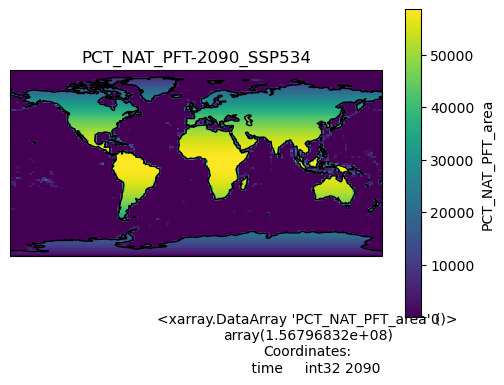

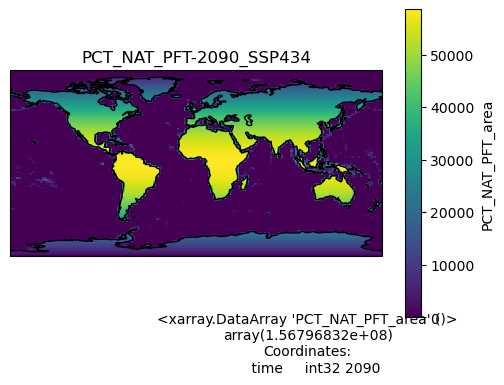

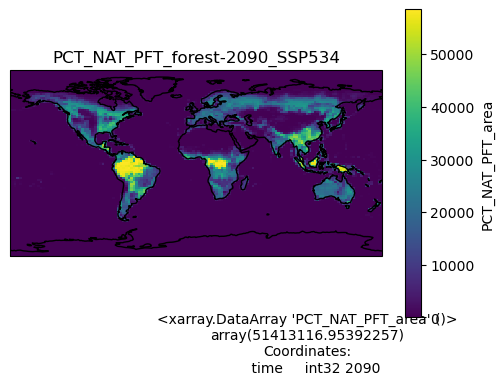

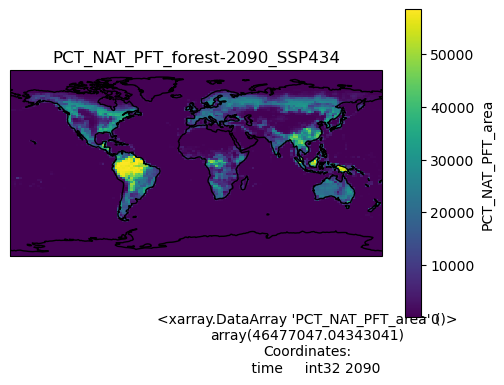

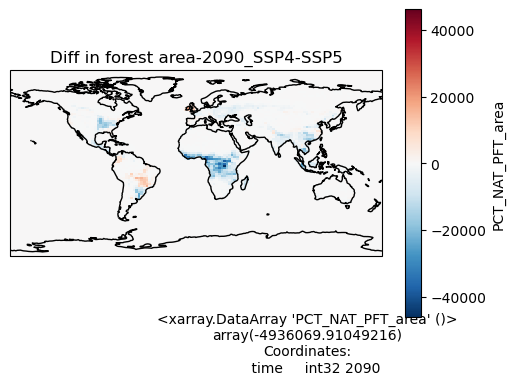

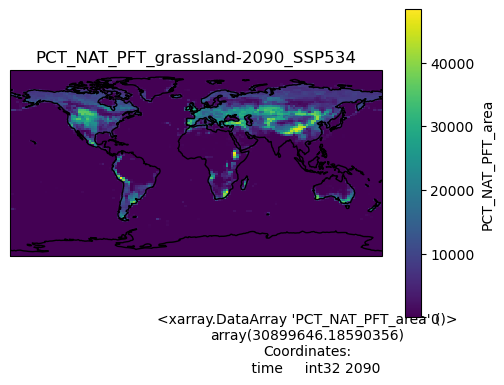

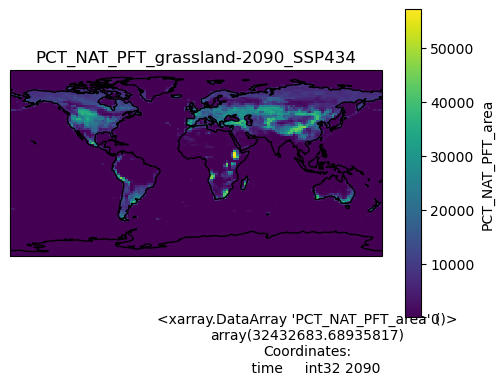

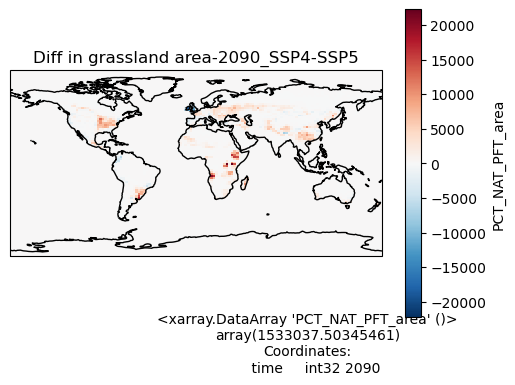

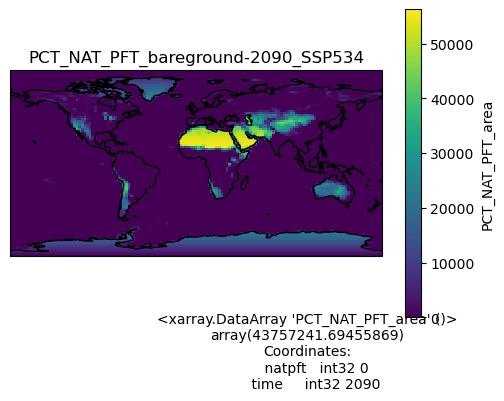

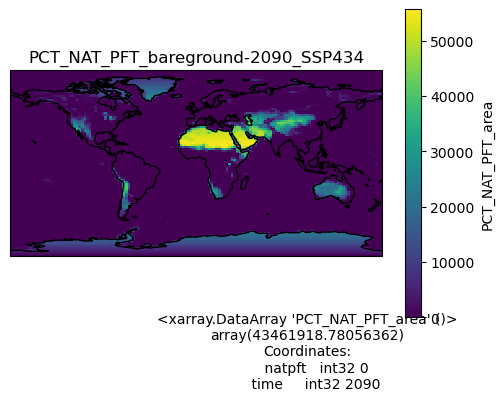

In [5]:
#dset['PCT_NAT_PFT'].sum('natpft')
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_NAT_PFT_area'].sel(time=2090).sum('natpft').plot()
plt.title('PCT_NAT_PFT-2090_SSP534')
print(dset1['PCT_NAT_PFT_area'].sel(time=2090).sum())
plt.text(0.8, -0.3, dset1['PCT_NAT_PFT_area'].sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset['PCT_NAT_PFT_area'].sel(time=2090).sum('natpft').plot()
plt.title('PCT_NAT_PFT-2090_SSP434')
plt.text(0.8, -0.3, dset['PCT_NAT_PFT_area'].sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)


##forest

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_NAT_PFT_area'].isel(natpft=slice(1,11)).sum(dim='natpft').sel(time=2090).plot()
a=dset1['PCT_NAT_PFT_area'].isel(natpft=slice(1,11)).sum(dim='natpft').sel(time=2090)
plt.title('PCT_NAT_PFT_forest-2090_SSP534')
print(dset1['PCT_NAT_PFT_area'].sel(time=2090).sum())
plt.text(0.8, -0.3, dset1['PCT_NAT_PFT_area'].isel(natpft=slice(1,11)).sum(dim='natpft').sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset['PCT_NAT_PFT_area'].isel(natpft=slice(1,11)).sum(dim='natpft').sel(time=2090).plot()
b=dset['PCT_NAT_PFT_area'].isel(natpft=slice(1,11)).sum(dim='natpft').sel(time=2090)
plt.title('PCT_NAT_PFT_forest-2090_SSP434')
plt.text(0.8, -0.3, dset['PCT_NAT_PFT_area'].isel(natpft=slice(1,11)).sum(dim='natpft').sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(b-a).plot()
plt.title('Diff in forest area-2090_SSP4-SSP5')
plt.text(0.8, -0.3, (b-a).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

##grassland

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_NAT_PFT_area'].isel(natpft=slice(12,14)).sum(dim='natpft').sel(time=2090).plot()
c=dset1['PCT_NAT_PFT_area'].isel(natpft=slice(12,14)).sum(dim='natpft').sel(time=2090)
plt.title('PCT_NAT_PFT_grassland-2090_SSP534')
print(dset1['PCT_NAT_PFT_area'].sel(time=2090).sum())
plt.text(0.8, -0.3, dset1['PCT_NAT_PFT_area'].isel(natpft=slice(12,14)).sum(dim='natpft').sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset['PCT_NAT_PFT_area'].isel(natpft=slice(12,14)).sum(dim='natpft').sel(time=2090).plot()
d=dset['PCT_NAT_PFT_area'].isel(natpft=slice(12,14)).sum(dim='natpft').sel(time=2090)
plt.title('PCT_NAT_PFT_grassland-2090_SSP434')
plt.text(0.8, -0.3, dset['PCT_NAT_PFT_area'].isel(natpft=slice(12,14)).sum(dim='natpft').sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
(d-c).plot()
plt.title('Diff in grassland area-2090_SSP4-SSP5')
plt.text(0.8, -0.3, (d-c).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)

##bareground

fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset1['PCT_NAT_PFT_area'].isel(natpft=0).sel(time=2090).plot()
plt.title('PCT_NAT_PFT_bareground-2090_SSP534')
print(dset1['PCT_NAT_PFT_area'].sel(time=2090).sum())
plt.text(0.8, -0.3, dset1['PCT_NAT_PFT_area'].isel(natpft=0).sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
dset['PCT_NAT_PFT_area'].isel(natpft=0).sel(time=2090).plot()
plt.title('PCT_NAT_PFT_bareground-2090_SSP434')
plt.text(0.8, -0.3, dset['PCT_NAT_PFT_area'].isel(natpft=0).sel(time=2090).sum(), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
axs.coastlines(linewidth=1)



In [45]:
dset1['PCT_NAT_PFT_area'].isel(natpft=slice(1,11)).sum(dim='natpft').sel(time=2090).sum()

<xarray.DataArray 'PCT_NAT_PFT_area' ()>
array(51413116.95392257)
Coordinates:
    time     int32 2090